<a href="https://colab.research.google.com/github/ReynaraEzra/Image-Classification/blob/main/Image_Classification_Improve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification On Rock Paper Scissors**
# **Reynara Ezra Pratama**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 168 µs (started: 2021-06-19 17:30:06 +00:00)


## **Get Data**

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-19 17:30:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.60MB/s    in 3m 58s  

2021-06-19 17:34:05 (1.29 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]

time: 3min 59s (started: 2021-06-19 17:30:06 +00:00)


## **Extract Data**

In [ ]:
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

time: 4.74 s (started: 2021-06-19 17:34:05 +00:00)


## **Check Data**

In [ ]:
print('Number of Rock Images :{}'.format(len(os.listdir('/tmp/rockpaperscissors/rock/'))))
print('Number of Paper Images :{}'.format(len(os.listdir('/tmp/rockpaperscissors/paper/'))))
print('Number of Scissors Images :{}'.format(len(os.listdir('/tmp/rockpaperscissors/scissors/'))))
print('Total Images : {}'.format(
    len(os.listdir('/tmp/rockpaperscissors/rock/')) + 
    len(os.listdir('/tmp/rockpaperscissors/paper/')) + 
    len(os.listdir('/tmp/rockpaperscissors/scissors/'))
    )
)

Number of Rock Images :726
Number of Paper Images :712
Number of Scissors Images :750
Total Images : 2188
time: 12.6 ms (started: 2021-06-19 17:34:10 +00:00)


## **Split Folder**

In [ ]:
!pip install split_folders

time: 3.14 s (started: 2021-06-19 17:34:10 +00:00)


In [ ]:
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 2888.21 files/s]

time: 782 ms (started: 2021-06-19 17:34:13 +00:00)


In [ ]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train') ## Train Dataset
validation_dir = os.path.join(base_dir, 'val') ## Validation Dataset

time: 2.09 ms (started: 2021-06-19 17:34:14 +00:00)


In [ ]:
os.listdir('/tmp/rockpaperscissors/data/train')

['rock', 'paper', 'scissors']

time: 5.11 ms (started: 2021-06-19 17:34:14 +00:00)


In [ ]:
os.listdir('/tmp/rockpaperscissors/data/val')

['rock', 'paper', 'scissors']

time: 10.8 ms (started: 2021-06-19 17:34:14 +00:00)


In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

time: 8.65 ms (started: 2021-06-19 17:34:14 +00:00)


## **Check Train and Validation Size**

**Train 60%**

In [ ]:
total_size_train = (
    len(os.listdir('/tmp/rockpaperscissors/data/train/rock')) + 
    len(os.listdir('/tmp/rockpaperscissors/data/train/paper')) +
    len(os.listdir('/tmp/rockpaperscissors/data/train/scissors'))
)
print('Total Training Data is : {}'.format(total_size_train))

Total Training Data is : 1312
time: 6.19 ms (started: 2021-06-19 17:34:14 +00:00)


**Validation 40%**

In [ ]:
total_size_validation = (
    len(os.listdir('/tmp/rockpaperscissors/data/val/rock')) +
    len(os.listdir('/tmp/rockpaperscissors/data/val/paper')) +
    len(os.listdir('/tmp/rockpaperscissors/data/val/scissors'))
)
print('Total Valdation Data is : {}'.format(total_size_validation))

Total Valdation Data is : 876
time: 6.26 ms (started: 2021-06-19 17:34:14 +00:00)


## **Image Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
time: 227 ms (started: 2021-06-19 17:34:14 +00:00)


## **Construct Model Sequential Using CNN**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

time: 395 ms (started: 2021-06-19 17:34:14 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## **Run Model**

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

time: 24.4 ms (started: 2021-06-19 17:34:15 +00:00)


In [ ]:
history = model.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch = 41,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 1
)

Epoch 1/10
41/41 [==============================] - 69s 2s/step - loss: 0.9601 - accuracy: 0.5244 - val_loss: 0.6718 - val_accuracy: 0.7153
Epoch 2/10
41/41 [==============================] - 68s 2s/step - loss: 0.4134 - accuracy: 0.8460 - val_loss: 0.3126 - val_accuracy: 0.8877
Epoch 3/10
41/41 [==============================] - 68s 2s/step - loss: 0.2527 - accuracy: 0.9009 - val_loss: 0.3782 - val_accuracy: 0.8519
Epoch 4/10
41/41 [==============================] - 67s 2s/step - loss: 0.3067 - accuracy: 0.8880 - val_loss: 0.2561 - val_accuracy: 0.9039
Epoch 5/10
41/41 [==============================] - 67s 2s/step - loss: 0.2330 - accuracy: 0.9116 - val_loss: 0.2025 - val_accuracy: 0.9306
Epoch 6/10
41/41 [==============================] - 67s 2s/step - loss: 0.1818 - accuracy: 0.9345 - val_loss: 0.1345 - val_accuracy: 0.9537
Epoch 7/10
41/41 [==============================] - 67s 2s/step - loss: 0.1086 - accuracy: 0.9627 - val_loss: 0.1185 - val_accuracy: 0.9549
Epoch 8/10
41/41 [==

## **Plot Model History**

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 23.5 ms (started: 2021-06-19 17:47:26 +00:00)


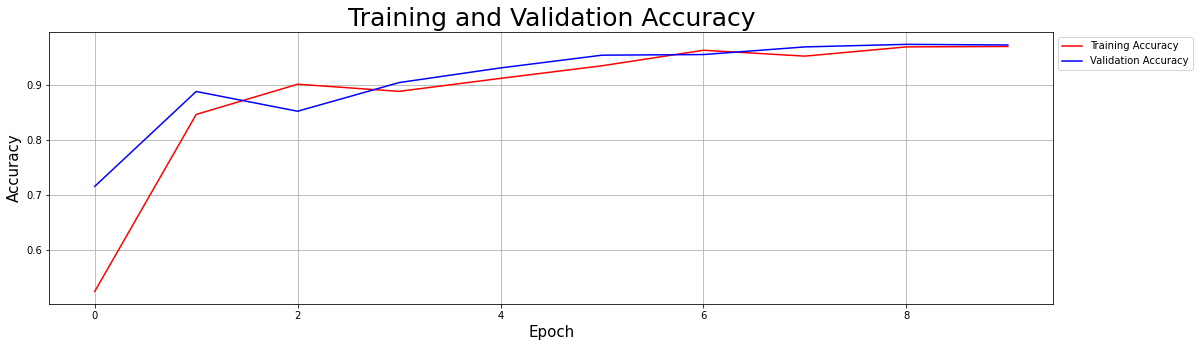

time: 231 ms (started: 2021-06-19 17:47:26 +00:00)


In [ ]:
plot_accuracy(history)

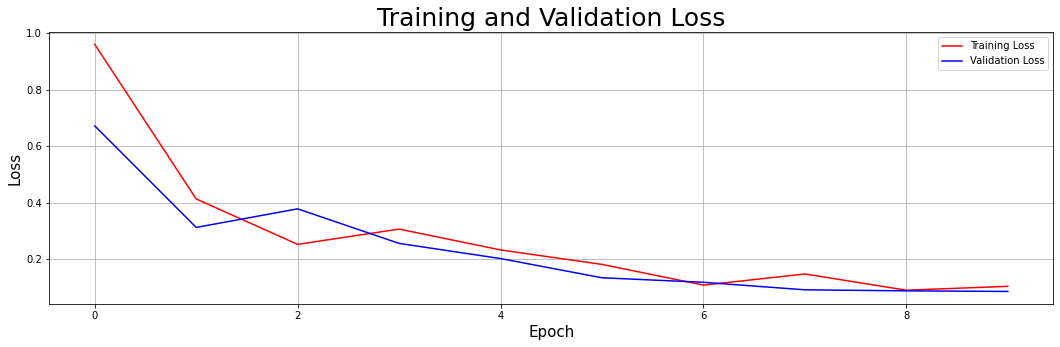

time: 207 ms (started: 2021-06-19 17:47:27 +00:00)


In [ ]:
plot_loss(history)

## **Predict Image**

Saving 471913.jpg to 471913 (5).jpg


Prediction : [0. 1. 0.] 

Image is detected as Rock


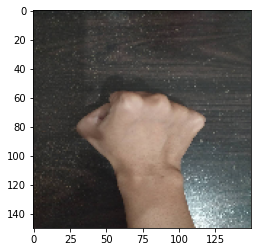

time: 14.6 s (started: 2021-06-19 18:16:13 +00:00)


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print('\n')
  print('Prediction :', classes[0], '\n')

  if classes[0][0] == 1:
    print('Image is detected as Paper')
  elif classes[0][1] == 1:
    print('Image is detected as Rock')
  else:
    print('Image is detected as Scissors')

Saving 471917.jpg to 471917 (1).jpg


Prediction : [1. 0. 0.] 

Image is detected as Paper


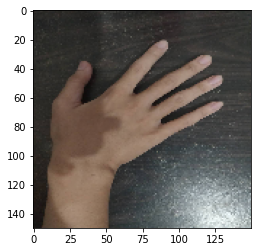

time: 9.87 s (started: 2021-06-19 18:10:26 +00:00)


In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  images = images*(1./255)
  classes = model.predict(images, batch_size=32)
  
  print('\n')
  print('Prediction :', classes[0], '\n')

  if classes[0][0] == 1:
    print('Image is detected as Paper')
  elif classes[0][1] == 1:
    print('Image is detected as Rock')
  else:
    print('Image is detected as Scissors')

Saving 471923.jpg to 471923 (1).jpg


Prediction : [9.7871631e-01 3.4395769e-05 2.1249233e-02] 

Image is detected as Scissors


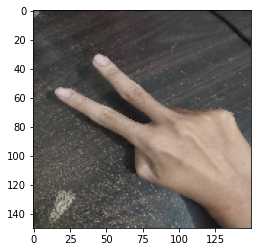

time: 13.6 s (started: 2021-06-19 18:10:46 +00:00)


In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  images = images*(1./255)
  classes = model.predict(images, batch_size=32)
  
  print('\n')
  print('Prediction :', classes[0], '\n')

  if classes[0][0] == 1:
    print('Image is detected as Paper')
  elif classes[0][1] == 1:
    print('Image is detected as Rock')
  else:
    print('Image is detected as Scissors')